# 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 01. Importing Libraries 
#### 02. Cleaning Data
#### 03. Elbow Techique
#### 04. K-means clustering

## 01. Importing Libraries and Data 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler   # For data standardization
import warnings
warnings.filterwarnings("ignore")

In [10]:
%matplotlib inline

In [11]:
#creating path
path = r'C:\Users\canam\Achievement 6\Citibike Analysis'

In [12]:
#importing data 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_cleaned.csv'), index_col = False)

In [13]:
df.shape

(50000, 17)

In [14]:
df.head()

,Unnamed: 0,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,subscriber,gender,age,trip_duration_mins
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,2,45.000000,16.550000
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,1,30.000000,9.683333
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,1,24.000000,6.016667
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,2,25.000000,9.350000
4,4,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,Non-Subscriber,0,37.372214,38.266667


## 02. Cleaning Data

In [16]:
#dropping unnamed column
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [18]:
#checking to see if unnamed column was dropped
df.head()

,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,subscriber,gender,age,trip_duration_mins
0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,2,45.000000,16.550000
1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,1,30.000000,9.683333
2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,1,24.000000,6.016667
3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,2,25.000000,9.350000
4,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,Non-Subscriber,0,37.372214,38.266667


In [26]:
# Selecting only the necessary columns (numerical columns) and putting them in a list called columns
columns = ["start_hour", "age", "trip_duration_mins"]

In [28]:
df_citibike = df[columns]

In [30]:
df_citibike.head()

,start_hour,age,trip_duration_mins
0,18,45.000000,16.550000
1,18,30.000000,9.683333
2,19,24.000000,6.016667
3,11,25.000000,9.350000
4,18,37.372214,38.266667


In [32]:
#checking for missing values 
df_citibike.isnull().sum()

start_hour            0
age                   0
trip_duration_mins    0
dtype: int64

In [34]:
#checking for duplicates
df_dups = df_citibike[df_citibike.duplicated()]

In [36]:
df_dups

,start_hour,age,trip_duration_mins
120,18,37.372214,44.950000
311,15,37.372214,44.950000
320,12,37.372214,44.950000
394,12,37.372214,44.950000
621,7,37.372214,44.950000
...,...,...,...
49985,18,25.000000,25.766667
49987,10,31.000000,15.583333
49990,8,48.000000,6.366667
49995,18,37.372214,44.950000


In [38]:
#I will leave these rows in because removing them would mean removing more than 5% of data.

In [40]:
#checking for mixed data 
for col in df_citibike.columns.tolist():
  weird = (df_citibike[[col]].map(type) != df_citibike[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_citibike[weird]) > 0:
    print (col)

In [42]:
#no columns with mixed data

## 03. Elbow Technique

In [45]:
num_cl = range(1, 10) # Defining the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defining k-means clusters in the range assigned above.

In [47]:
score = [kmeans[i].fit(df_citibike).score(df_citibike) for i in range(len(kmeans))] # Creating a score that represents 
# a rate of variation for the given cluster option.

score

[-10911158.179476336,
 -7511080.968553548,
 -4777697.376936847,
 -3979434.471830908,
 -3408265.698262399,
 -3076914.356292555,
 -2884649.574180889,
 -2536982.0882809185,
 -2372687.4139360967]

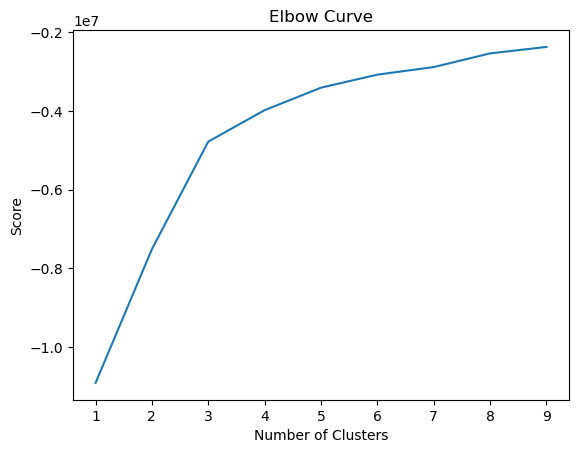

In [48]:
# Plotting the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I will be using 3 clusters as there is a big jump from 2 to 3.  After this the increase becomes more gradual.  

## 04. K-means clustering

In [53]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [55]:
# Fitting the k-means object to the data.

kmeans.fit(df_citibike)

KMeans(n_clusters=3)

In [59]:
df_citibike.loc[:,'clusters'] = kmeans.fit_predict(df_citibike)

In [61]:
df_citibike

,start_hour,age,trip_duration_mins,clusters
0,18,45.000000,16.550000,1
1,18,30.000000,9.683333,0
2,19,24.000000,6.016667,0
3,11,25.000000,9.350000,0
4,18,37.372214,38.266667,2
...,...,...,...,...
49995,18,37.372214,44.950000,2
49996,17,43.000000,19.850000,2
49997,18,52.000000,17.500000,1
49998,13,37.372214,44.950000,2


In [69]:
df_citibike.to_csv(os.path.join(path, '02 Data','Prepared Data', 'citibike_cleaned_with_clusters'))

In [3]:
df_citibike['clusters'].value_counts()

NameError: name 'df_citibike' is not defined

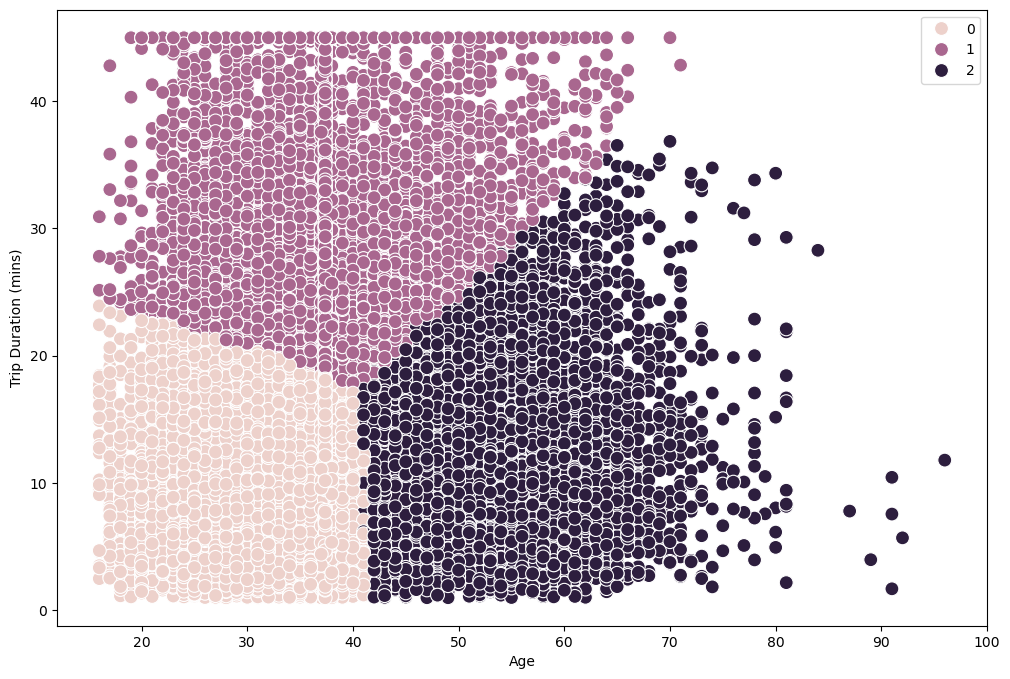

In [56]:
# Plotting the clusters for the "age" and "trip_duration_mins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['age'], y=df['trip_duration_mins'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Age') 
plt.ylabel('Trip Duration (mins)') 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_trip_duration_cluster.png'),bbox_inches = 'tight') #saving figure 
plt.show()

#### These clusters don't make any sense to me.  They don't really tell me anything. 

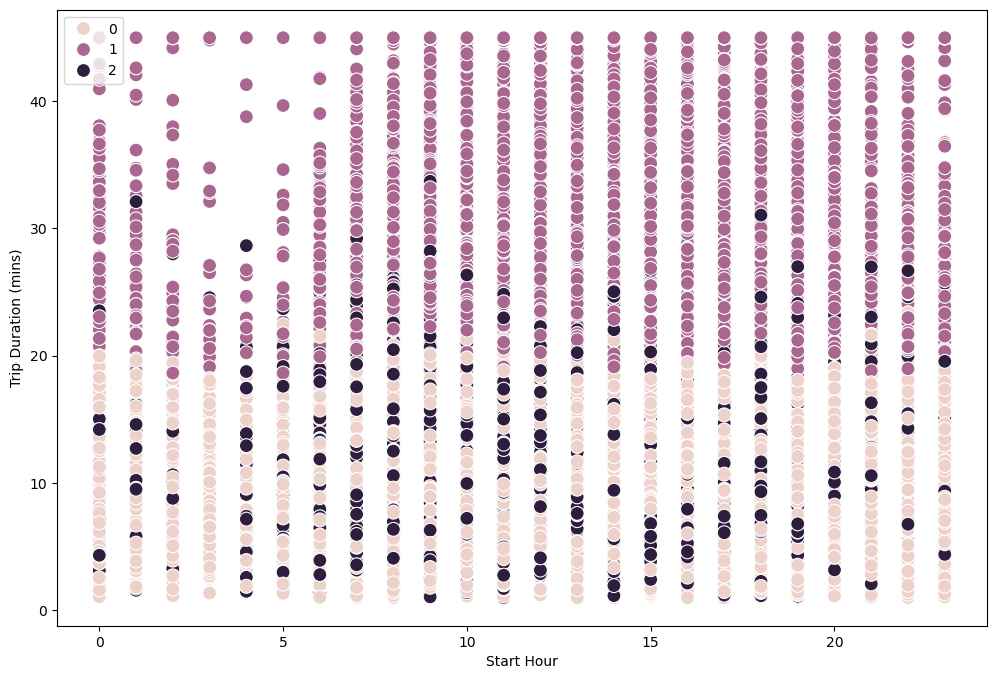

In [58]:
# Plotting the clusters for the "start Hour" and "trip_duration_mins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['start_hour'], y=df['trip_duration_mins'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Start Hour') 
plt.ylabel('Trip Duration (mins)') 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'start_hour_trip_duration.png'),bbox_inches = 'tight') #saving figure 
plt.show()

#### The only thing this graph tells me is that trip duration tends to decrease from 1 - 4 am and begins to increase again at 5 am.   

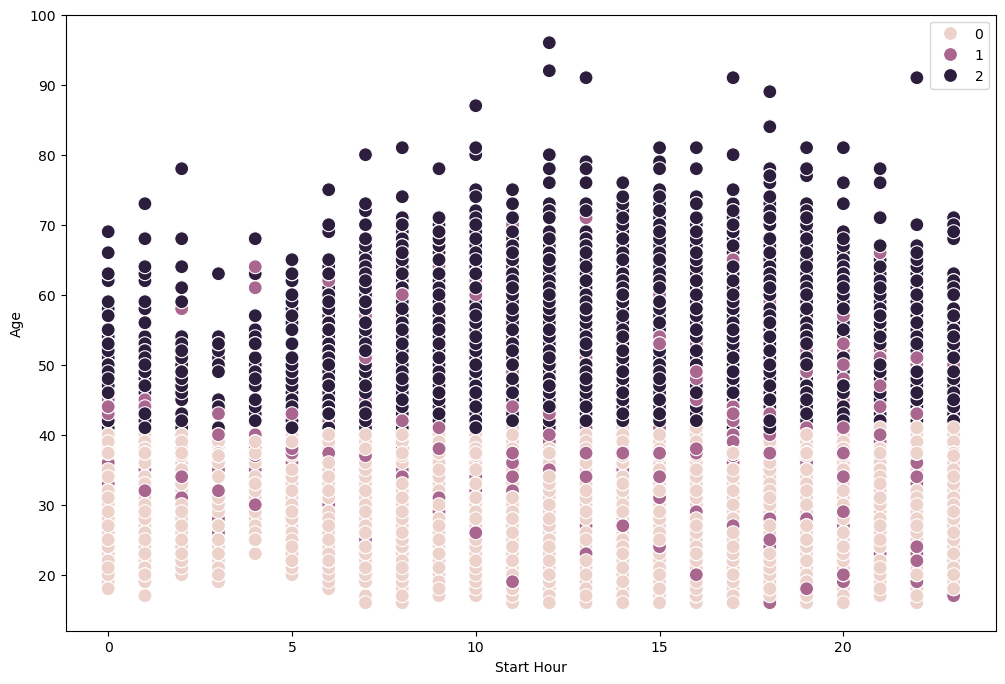

In [61]:
# Plotting the clusters for the "age" and "start_hour" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['start_hour'], y=df['age'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Start Hour') 
plt.ylabel('Age') 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_start_hour_cluster.png'),bbox_inches = 'tight') #saving figure 
plt.show()

#### These clusters also don't make sense to me.

In [64]:
df_citibike.loc[df_citibike['clusters'] == 2, 'cluster'] = 'dark purple'
df_citibike.loc[df_citibike['clusters'] == 1, 'cluster'] = 'purple'
df_citibike.loc[df_citibike['clusters'] == 0, 'cluster'] = 'pink'

In [66]:
df_citibike.groupby('cluster').agg({'age':['mean', 'median'], 
                         'trip_duration_mins':['mean', 'median'], 
                         'start_hour':['mean', 'median']})

age            trip_duration_mins            start_hour  \
                  mean     median               mean     median       mean   
cluster                                                                      
dark purple  50.700876  49.000000          10.834719   9.733333  13.528344   
pink         31.419005  32.000000           9.756193   9.116667  14.264359   
purple       36.647380  37.372214          28.997096  26.816667  14.584241   

                    
            median  
cluster             
dark purple   14.0  
pink          15.0  
purple        15.0

### Intepretations 

#### Age does not seem to affect trip duration because we can see that the cluster with the highest median age (dark purple) has a higher trip duration median than the pink cluster but not the purple cluster.  

#### Start hour doesn't affect trip duration because we can see that the cluster with the lowest median trip duration (pink) has the same median start hour as the cluster with the highest median trip duration (purple).  

#### Age seems to have a small effect on the start hour because we can see that cluster with the highest median age (dark purple) has an earlier start hour than the other two.  

#### A future study could organize the dataset by gender or subscriber status.  Doing this may help reveal patterns that we were unable to see in this exercise.  In addition, different algorithms could be used to analyze the data.